In [1]:
!ls

sample_data  VDSR_KERAS


In [2]:
cd VDSR_KERAS

/content/VDSR_KERAS


In [3]:
!ls

baby_GT.bmp  butterfly_GT.bmp  head_GT.bmp  SCALE3VDSR.h5
bird_GT.bmp  func_rgb.py       __pycache__  woman_GT.bmp


In [4]:
import cv2
import h5py
from func_rgb import *
from skimage.measure import compare_ssim

Using TensorFlow backend.


In [5]:
scale=3
r_field=41
src=loadimg("baby_GT.bmp")
src_LR=create_LR(src,scale)
sub_gt=subimg(src,r_field)
lr=subimg(src_LR,r_field)


model=vdsr_model_add(r_field)
model.summary()
model.load_weights("SCALE3VDSR.h5")
pred=model.predict(lr)

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 41, 41, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 41, 41, 64)   1792        input[0][0]                      
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 41, 41, 64)   36928       conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 41, 41, 64)   36928       conv2d_2[0][0]                   
_____________________________________

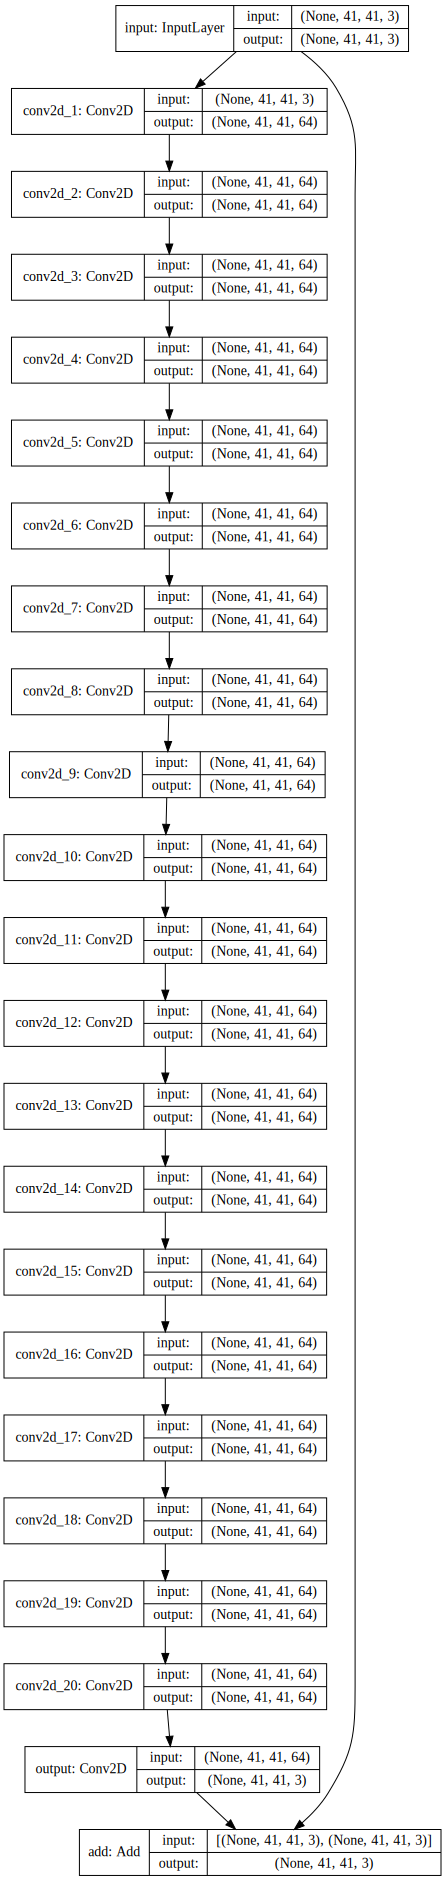

In [6]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [0]:
H,W,_=src[0].shape
_sub_gt=reconstruction(sub_gt,H,W,r_field)
_lr=reconstruction(lr,H,W,r_field)
_pred=reconstruction(pred,H,W,r_field)

In [8]:
p1=psnr(_sub_gt,_lr)
p2=psnr(_sub_gt,_pred)
s1=compare_ssim(_sub_gt,_lr,multichannel=True)
s2=compare_ssim(_sub_gt,_pred,multichannel=True)
#cv2.imshow("GT",_sub_gt)
#cv2.imshow("LR",_lr)
#cv2.imshow("predict",_pred)
print("lr:",p1)
print("lr:",s1)
print("predict:",p2)
print("predict:",s2)
#cv2.waitKey(0)

lr: 31.670
lr: 0.939057448601691
predict: 31.847
predict: 0.9385807289989015


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 491.5, 491.5, -0.5)

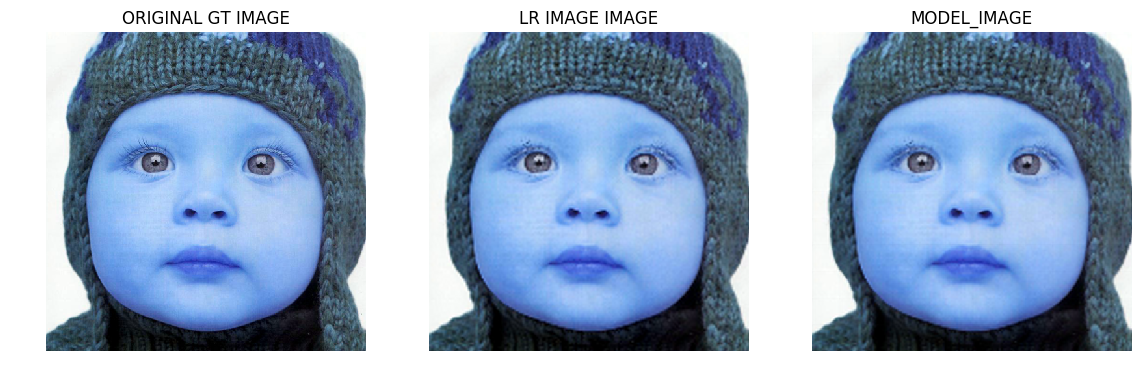

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(14,14),dpi=100)
ax = plt.subplot("131")
ax.imshow(_sub_gt)
ax.set_title('ORIGINAL GT IMAGE')
plt.axis('off')

ax = plt.subplot("132")
ax.imshow(_lr)
ax.set_title('LR IMAGE IMAGE')
plt.axis('off')

ax = plt.subplot("133")
ax.imshow(_pred)
ax.set_title('MODEL_IMAGE')
plt.axis('off')